# Problem Statement
Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

They first identify a set of employees based on recommendations/ past performance

Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. ￼

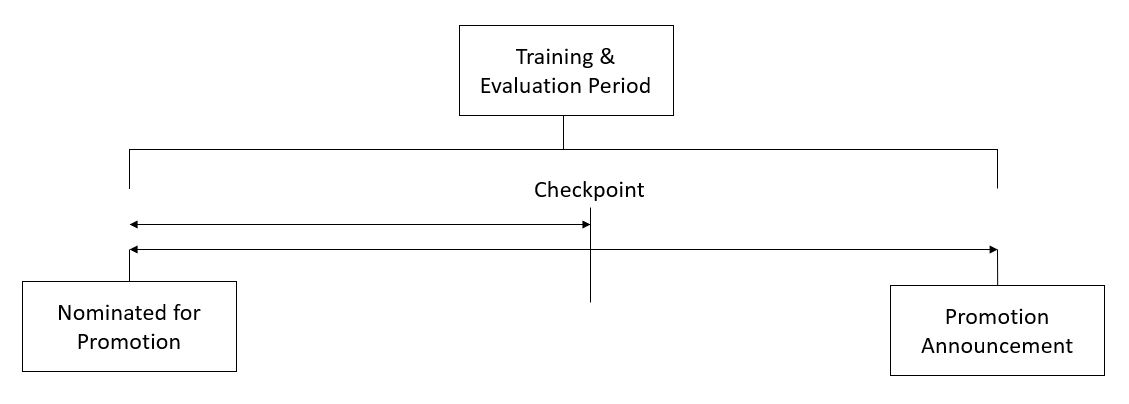
They have provided multiple attributes around Employee's past and current performance along with demographics. Now, The task is to predict whether a potential promotee at checkpoint in the test set will be promoted or not after the evaluation process.
 

Dataset Description

Variable                  Definition
employee_id               Unique ID for employee
department                Department of employee
region                    Region of employment (unordered)
education                 Education Level
gender                    Gender of Employee
recruitment_channel       Channel of recruitment for employee
no_of_trainings           no of other trainings completed in previous year on
                          soft skills, technical skills etc.
age                       Age of Employee
previous_year_rating      Employee Rating for the previous year
length_of_service         Length of service in years
KPIs_met >80%             if Percent of KPIs(Key performance Indicators)
                          >80% then 1 else 0
awards_won?               if awards won during previous year then 1 else 0 avg_training_score        Average score in current training evaluations is_promoted(Target)       Recommended for promotion

 

Evaluation Metric

The evaluation metric for this competition is F1 Score.
 

Public and Private Split

Test data is further randomly divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.

The final rankings would be based on your private score which will be published once the competition is over.



# Importing some necessory modules
Numpy- By numpy(Numerical Python) we can perform mathematical and logical operations on arrays.

Pandas- Pandas(Python Data Analysis Library) is used to analyze data and help us to manipulate data.

Matplotlib- Matplotlib is a plotting library for the Python programming language by this we can plot histogram,pieplot,linegraph etc.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Reading the csv file
For the comfortness i have uploaded the file in github and after that i use pd.read_csv(filepath) which return a Dataframe.
Let look how our dataset is. 

In [99]:
data=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/Promotion-or-not/main/train_LZdllcl.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Analysing dataset
First we note the size of our data that how large is our dataset. We found that we have 54808 rows and 14 columns.
Then we take an overview of our dataset that what type of features and label we have. 

In [100]:
print("Shape: ",data.shape)
print(data.info())

Shape:  (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5

# Balanced or Imbalanced
After observing our dataset we found that in the label there are 50140 which belonged to class 0 and only 4668 belonged to class 1. This can be clearly seen in the histogram graph.

So this means that our dataset is suffering from Imbalancing in which our data label has enough type of one class and less type of other class.
In this our model gets train with majority class and will give high accuracy for majority class but has low accuracy for miniority class.

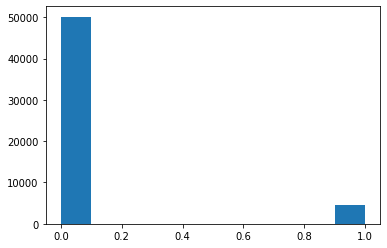

0    50140
1     4668
Name: is_promoted, dtype: int64

In [101]:
plt.hist(data.is_promoted)
plt.show()
data.is_promoted.value_counts()

# Cheacking for Null Values
There can be chance in the dataset we some null values. Null values are the missing values which should be handeled as it may lead to the overfitting problem. In our dataset we have 2409 values missing in education column and 4124 values missing in previous_year_rating.

In [102]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Feature extraction according to the Knowledge base:

employee_id- Obviosly employee id can be ignored because it can not provide any link towards promotion. 

department- Department sector is also unnecssory on which the promotion is not dependent.
Like that only we have many features(region, education, gender, recruitment_channel, no_of_trainings, age) which has no relation with the promotion.

In [127]:
data=data[['previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']]

In [128]:
print("Previous Year Rating- \n",data.previous_year_rating.value_counts())

Previous Year Rating- 
 3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64


# Filling the Nan Values
We have some missing values in our dataset so we have two option we can left the whole row or we can fill it.
As we have few missing values so it is better to fill it with mean of that feature.

In [141]:
df=data
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].mean()).astype('int64')
df.isnull().sum()

previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# Co-relation
After selecting the features we are intrested in that how the features are affecting the label. -1 will indicate the feature is effecting in bad way 0 shows there is no relation between

In [142]:
corrmat = df.corr() 
corrmat

,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
previous_year_rating,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


# Heat Map
Heat mappinf technique is for visualising the numeric co relation the graph form.

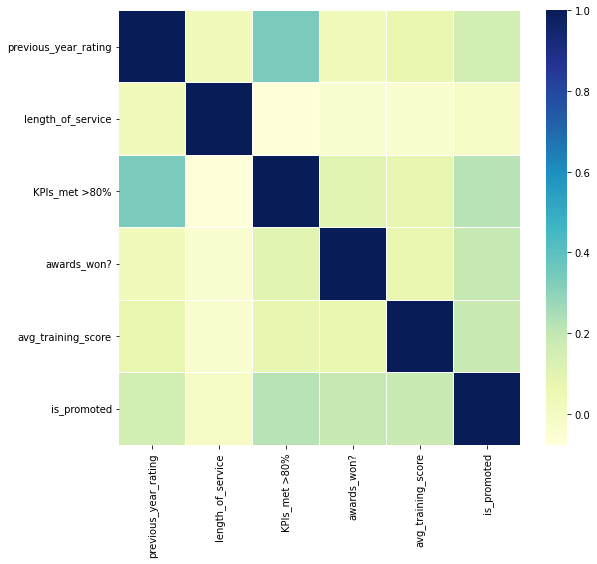

In [143]:
import seaborn as sns
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

# Select the features and label column

In [144]:
X=df[['KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating']]
Y=df.is_promoted

# Train Test Split
Now our dataset has two part in which first part will be used for training the model and the other part to find the accuracy.

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.3, random_state = 0)
print(x_train.shape,y_test.shape)

(38365, 4) (16443,)


In [146]:
y_train.value_counts()

0    35083
1     3282
Name: is_promoted, dtype: int64

We know that our data is imbalanced so we use synthetic minority oversampling technique to overcome from this situation.

In [147]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train, y_train = sm.fit_resample(x_train, y_train)
y_train.value_counts()

0    35083
1    35083
Name: is_promoted, dtype: int64

# GaussianNB
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian.

[[12484  2573]
 [  667   719]]


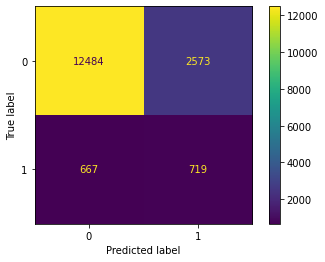

F1 is:  0.3073963232150491
Accuracy Score:   0.8029556650246306


In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,accuracy_score,f1_score
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_y_pred = gnb.predict(x_test)
print(confusion_matrix(y_test,gnb_y_pred,labels=[0,1]))
cm = confusion_matrix(y_test, gnb_y_pred, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()
print('F1 is: ', f1_score(y_test,gnb_y_pred))
print("Accuracy Score:  ",accuracy_score(y_test,gnb_y_pred))

# Logistic regression
Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for a given set of features(or inputs), X. Contrary to popular belief, logistic regression IS a regression model.

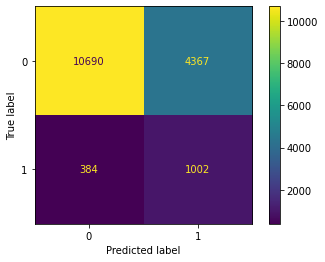

F1 is:  0.29666913397483347
Accuracy Score:   0.711062458188895


In [167]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
lr_y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, lr_y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()
print('F1 is: ', f1_score(y_test,lr_y_pred))
print("Accuracy Score:  ",accuracy_score(y_test,lr_y_pred))

# Reading the Testing Dataset

In [168]:
testdata=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/Promotion-or-not/main/test_2umaH9m.csv")
testdata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Extracting the features fronm testing dataset

In [169]:
X_test=testdata[['KPIs_met >80%','awards_won?','avg_training_score','previous_year_rating']]
X_test.head()

,KPIs_met >80%,awards_won?,avg_training_score,previous_year_rating
0,1,0,77,NaN
1,0,0,51,3.0
2,0,0,47,1.0
3,0,0,65,2.0
4,0,0,61,4.0


# Predicting the value for the test set 

In [170]:
X_test.previous_year_rating.fillna(X_test.previous_year_rating.mean(),inplace=True)
gnb_y_pred = gnb.predict(X_test)
gnb_y_pred

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([1, 0, 0, ..., 0, 0, 1])

In [171]:
testdata.insert(13,"is_promoted",gnb_y_pred)

In [173]:
testdata.to_csv("predicted.csv")